<a href="https://colab.research.google.com/github/Jatinnagar777/demo/blob/main/Dog_vs_Cat_Classification_using_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Extracting dataset from Kaggle API**

In [1]:
# Configure the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Importing Dog vs Cat dataset from kaggle

In [2]:
# Kaggle API
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:30<00:00, 26.4MB/s]
100% 812M/812M [00:30<00:00, 28.1MB/s]


In [3]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset = 'train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('train'))
file_counts = len(files)
print('Number of images: ', file_counts)

Number of images:  25000


Printing name of images

In [6]:
file_names = os.listdir('train')
print(file_names)

['cat.9190.jpg', 'dog.10895.jpg', 'cat.3403.jpg', 'cat.630.jpg', 'dog.7147.jpg', 'cat.3512.jpg', 'cat.714.jpg', 'dog.4482.jpg', 'dog.7643.jpg', 'cat.12412.jpg', 'cat.10908.jpg', 'cat.8805.jpg', 'dog.6761.jpg', 'cat.7150.jpg', 'dog.807.jpg', 'cat.12495.jpg', 'cat.300.jpg', 'cat.10926.jpg', 'dog.12238.jpg', 'dog.7636.jpg', 'dog.6847.jpg', 'dog.12492.jpg', 'dog.628.jpg', 'dog.6930.jpg', 'cat.12135.jpg', 'cat.1315.jpg', 'dog.5182.jpg', 'dog.3534.jpg', 'dog.1498.jpg', 'cat.2690.jpg', 'dog.6556.jpg', 'dog.7777.jpg', 'cat.8960.jpg', 'dog.8643.jpg', 'cat.6264.jpg', 'dog.8702.jpg', 'cat.4244.jpg', 'dog.12088.jpg', 'dog.7273.jpg', 'dog.1900.jpg', 'dog.7830.jpg', 'dog.2859.jpg', 'dog.7004.jpg', 'dog.8169.jpg', 'cat.2730.jpg', 'dog.1265.jpg', 'dog.10645.jpg', 'dog.9897.jpg', 'cat.8418.jpg', 'cat.3585.jpg', 'dog.6457.jpg', 'dog.2746.jpg', 'dog.1253.jpg', 'dog.4918.jpg', 'dog.6062.jpg', 'dog.11345.jpg', 'cat.11738.jpg', 'cat.7730.jpg', 'dog.8135.jpg', 'cat.11340.jpg', 'dog.7667.jpg', 'cat.3885.jpg',

Importing the libraries

In [7]:
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

Displaying the images of Dogs and Cats

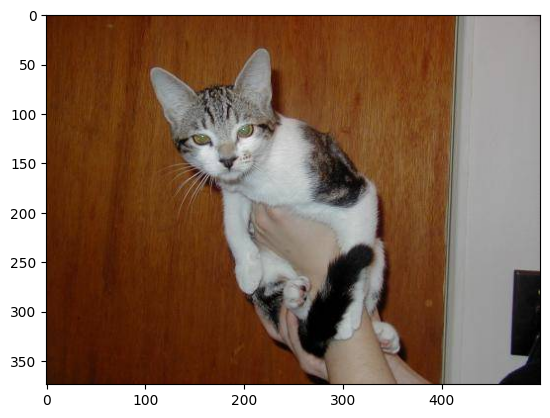

In [8]:
# display the cat image
img = mpimg.imread('train/cat.3403.jpg')
imgplt = plt.imshow(img)
plt.show()

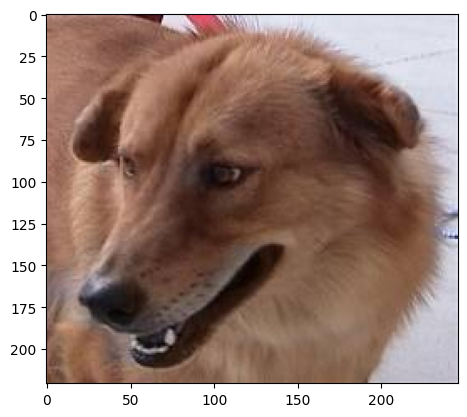

In [9]:
# display the dog image
img = mpimg.imread('train/dog.10895.jpg')
imgplt = plt.imshow(img)
plt.show()

In [10]:
file_names = os.listdir('train')
for i in range(5):
  name = file_names[i]
  print(name[0:3])

cat
dog
cat
cat
dog


In [11]:
file_names = os.listdir('train')
dog_count = 0
cat_count = 0
for img_file in file_names:
  name = img_file[0:3]

  if name=='dog':
    dog_count+=1
  else:
    cat_count+=1

print('Number of dogs: ', dog_count)
print('Number of cats: ', cat_count)

Number of dogs:  12500
Number of cats:  12500


Resizing all the images

In [12]:
# Creating a directory for resized images
os.mkdir('image resized')

In [13]:
original_folder = 'train/'
resized_folder = 'image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

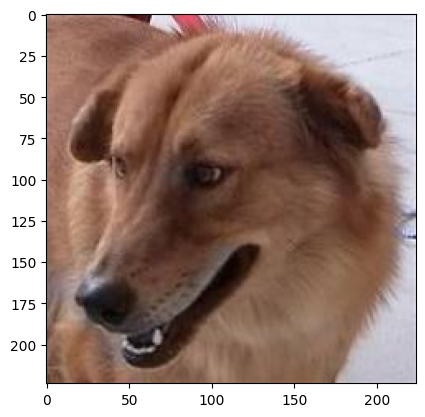

In [14]:
# display the resized dog image
img = mpimg.imread('image resized/dog.10895.jpg')
imgplt = plt.imshow(img)
plt.show()

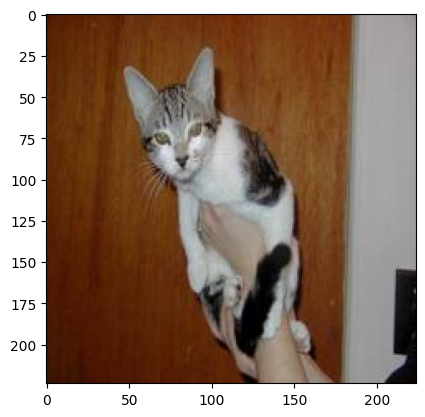

In [15]:
# display the resized  cat image
img = mpimg.imread('image resized/cat.3403.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of cats and dogs

Cat-> 0
Dog-> 1

In [16]:
# Creating a for loop to assign a label
filenames = os.listdir('image resized')
labels = []
for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)

In [17]:
print(filenames[0:5])
print(len(filenames))

['cat.9190.jpg', 'dog.10895.jpg', 'cat.3403.jpg', 'cat.630.jpg', 'dog.7147.jpg']
2000


In [18]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 0, 1]
2000


In [19]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 991 1009]


Converting all the resized images to numpy arrays

In [20]:
import cv2
import glob

In [21]:
image_directory = 'image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [22]:
print(dog_cat_images)

[[[[243 243 237]
   [243 243 237]
   [243 243 237]
   ...
   [197 201 189]
   [196 200 188]
   [196 200 188]]

  [[243 243 237]
   [243 243 237]
   [243 243 237]
   ...
   [197 201 189]
   [196 200 188]
   [196 200 188]]

  [[243 243 237]
   [243 243 237]
   [243 243 237]
   ...
   [196 200 188]
   [196 200 188]
   [196 200 188]]

  ...

  [[220 219 235]
   [220 219 235]
   [221 220 236]
   ...
   [174 182 199]
   [173 181 198]
   [173 181 198]]

  [[220 219 235]
   [220 219 235]
   [221 220 236]
   ...
   [176 185 199]
   [176 185 199]
   [176 185 199]]

  [[220 219 235]
   [220 219 235]
   [221 220 236]
   ...
   [181 190 204]
   [180 189 203]
   [180 189 203]]]


 [[[139 151 193]
   [129 141 183]
   [139 151 193]
   ...
   [235 223 221]
   [240 228 226]
   [248 236 234]]

  [[145 157 199]
   [128 140 182]
   [131 143 185]
   ...
   [233 221 219]
   [238 226 224]
   [246 234 232]]

  [[146 158 200]
   [123 135 177]
   [119 131 173]
   ...
   [236 224 222]
   [241 229 227]
   [249 237

In [23]:
type(dog_cat_images)

numpy.ndarray

In [24]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [25]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
X.shape, X_train.shape, X_test.shape

((2000, 224, 224, 3), (1600, 224, 224, 3), (400, 224, 224, 3))

In [29]:
# Scaling the data
X_train_scale = X_train/255
X_test_scale = X_test/255

In [31]:
print(X_train_scale)

[[[[0.59607843 0.63137255 0.67058824]
   [0.59607843 0.63137255 0.67058824]
   [0.59607843 0.63137255 0.67058824]
   ...
   [0.58039216 0.63137255 0.69411765]
   [0.58039216 0.63137255 0.69411765]
   [0.57647059 0.62745098 0.69019608]]

  [[0.59607843 0.63137255 0.67058824]
   [0.59607843 0.63137255 0.67058824]
   [0.59607843 0.63137255 0.67058824]
   ...
   [0.58039216 0.63137255 0.69411765]
   [0.58039216 0.63137255 0.69411765]
   [0.57647059 0.62745098 0.69019608]]

  [[0.59607843 0.63137255 0.67058824]
   [0.59607843 0.63137255 0.67058824]
   [0.59607843 0.63137255 0.67058824]
   ...
   [0.58039216 0.63137255 0.69411765]
   [0.58039216 0.63137255 0.69411765]
   [0.57647059 0.62745098 0.69019608]]

  ...

  [[0.59215686 0.61960784 0.67843137]
   [0.54901961 0.58039216 0.63137255]
   [0.57647059 0.60392157 0.6627451 ]
   ...
   [0.58823529 0.64313725 0.71372549]
   [0.58823529 0.64313725 0.71372549]
   [0.58431373 0.63921569 0.70980392]]

  [[0.60392157 0.63529412 0.68627451]
   [0.5

**Building the Neural Network**

In [32]:
import tensorflow as tf
import tensorflow_hub as hub

In [36]:
mobilenet_model = 'https://www.kaggle.com/models/google/mobilenet-v2/frameworks/tensorFlow2/variations/tf2-preview-feature-vector/versions/4?tfhub-redirect=true'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [37]:
num_of_classes = 2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [39]:
model.compile(
    optimizer='Adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [41]:
model.fit(X_train_scale, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 66s 1s/step - loss: 0.1804 - acc: 0.9237
Epoch 2/5
50/50 [==============================] - 58s 1s/step - loss: 0.0627 - acc: 0.9775
Epoch 3/5
50/50 [==============================] - 58s 1s/step - loss: 0.0473 - acc: 0.9869
Epoch 4/5
50/50 [==============================] - 58s 1s/step - loss: 0.0357 - acc: 0.9900
Epoch 5/5
50/50 [==============================] - 60s 1s/step - loss: 0.0306 - acc: 0.9912


In [42]:
loss_score, accuracy = model.evaluate(X_test_scale, Y_test)
print('Test loss: ', loss_score)
print('Accuarcy: ', accuracy)

13/13 [==============================] - 15s 1s/step - loss: 0.0740 - acc: 0.9850
Test loss:  0.07402956485748291
Accuarcy:  0.9850000143051147


**Predictive System**

Path of the image to be predicted: /content/images.jpeg


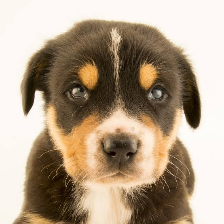

1/1 [==============================] - 0s 77ms/step
[[-3.7152178  1.841138 ]]
1
The image represents a Dog


In [46]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
input_image_resize = cv2.resize(input_image, (224,224))
cv2_imshow(input_image_resize)

input_image_scale = input_image_resize/225
image_reshaped = np.reshape(input_image_scale, [1,224,224,3])
input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label==0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')